# Einfache Quantilplots

In [5]:
source("util.R")
options(warn = -1)
options(repr.plot.width=25, repr.plot.height=10)

# Median vs Mittelwert einer $\chi^2$-Verteilung

Daten

In [6]:
df <- 5

# Dichte
x_values <- seq(0, 20, length.out = 1000)

density_data <- data.frame(x = x_values, y = dchisq(x_values, df = df))
cdf_data <- data.frame(x = x_values, y = pchisq(x_values, df = df))

median <- qchisq(0.5, df = df)
# Mittelwert einer Chi-Quadrat Verteilung = df
mean <- df

Plots

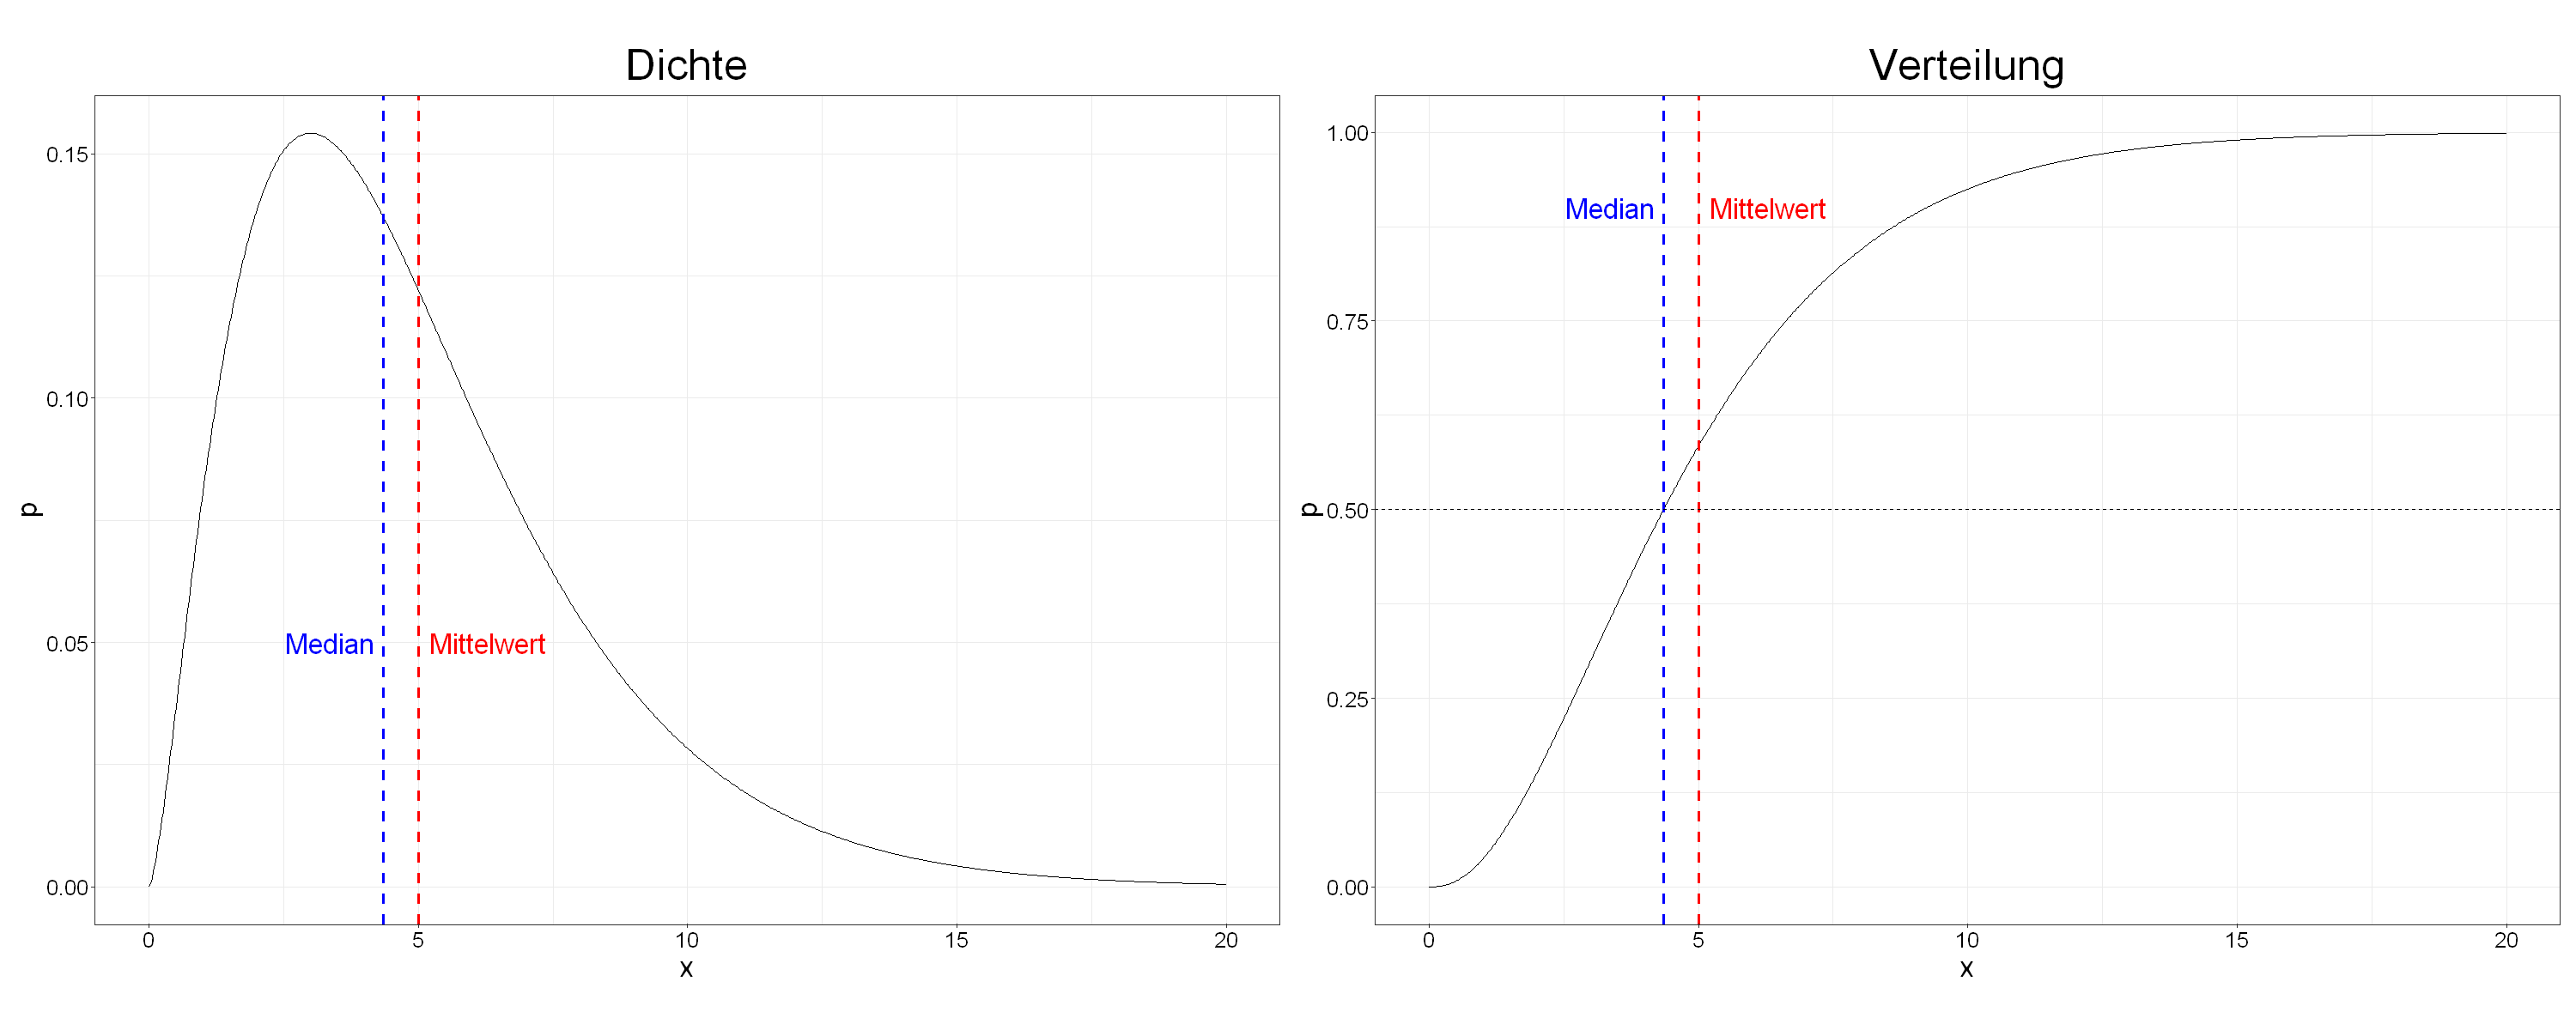

In [7]:
density_plot <- ggplot(density_data, aes(x = x, y = y)) +
  geom_line() +
  geom_vline(xintercept = median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_vline(xintercept = mean, linetype = "dashed", color = "red", linewidth=1) +
  annotate("text", x = median, y = 0.05, label = "Median", hjust = 1.1, color = "blue", size=7) +
  annotate("text", x = mean, y = 0.05, label = "Mittelwert", hjust = -0.1, color = "red", size=7) +
  labs(title="Dichte", x = "x", y = "p") +
  jupyter_theme() +    
  theme(aspect.ratio=0.7)

cdf_plot <- ggplot(cdf_data, aes(x = x, y = y)) +
  geom_line() +
  geom_vline(xintercept = median, color = "blue", linetype = "dashed", linewidth=1) +
  geom_vline(xintercept = mean, color = "red", linetype = "dashed", linewidth=1) +
  annotate("text", x = median, y = 0.9, label = "Median", hjust = 1.1, color = "blue", size=7) +
  annotate("text", x = mean, y = 0.9, label = "Mittelwert", hjust = -0.1, color = "red", size=7) +
  geom_hline(yintercept = 0.5, linetype = "dashed") +
  labs(title="Verteilung", x = "x", y = "p") +
  jupyter_theme() + 
  theme(aspect.ratio=0.7)

median_plot = density_plot + cdf_plot
print(median_plot)

## Hilfsfunktionen

In [8]:
single_plot <- function(data, color, title, aspect_ratio=1) {
  gg <- ggplot(data, aes(x = x, y = y)) +
      geom_line(color = color, linewidth=1) +
      labs(x = NULL, y = NULL) +   
      ggtitle(title) +
      jupyter_theme() +    
      theme(aspect.ratio=aspect_ratio)
}

In [9]:
combined_plot <- function(distribution, pdf_data, cdf_data, quantile_data) {
  pdf_graph <- single_plot(pdf_data, "blue", "Dichte")
  cdf_graph <- single_plot(cdf_data, "green", "Verteilung")
  quantile_graph <- single_plot(quantile_data, "red", "Quantilplot")

  (pdf_graph | cdf_graph | quantile_graph) +
    plot_annotation( title = distribution, theme = theme(plot.title = element_text(size = 40, hjust = 0.5) ) )
}

In [10]:
combined_plot2 <- function(distribution, x, dfunc, pfunc, qfunc) {
  pdf_data  <- data.frame(x = x, y = dfunc(x))
  cdf_data  <- data.frame(x = x, y = pfunc(x))
  p <- seq(0, 1, length=100)
  quantile_data  <- data.frame(x = p, y = qfunc(p))

  combined_plot(distribution, pdf_data, cdf_data, quantile_data)
}

## Beispiel 1 : Standardnormalverteilung

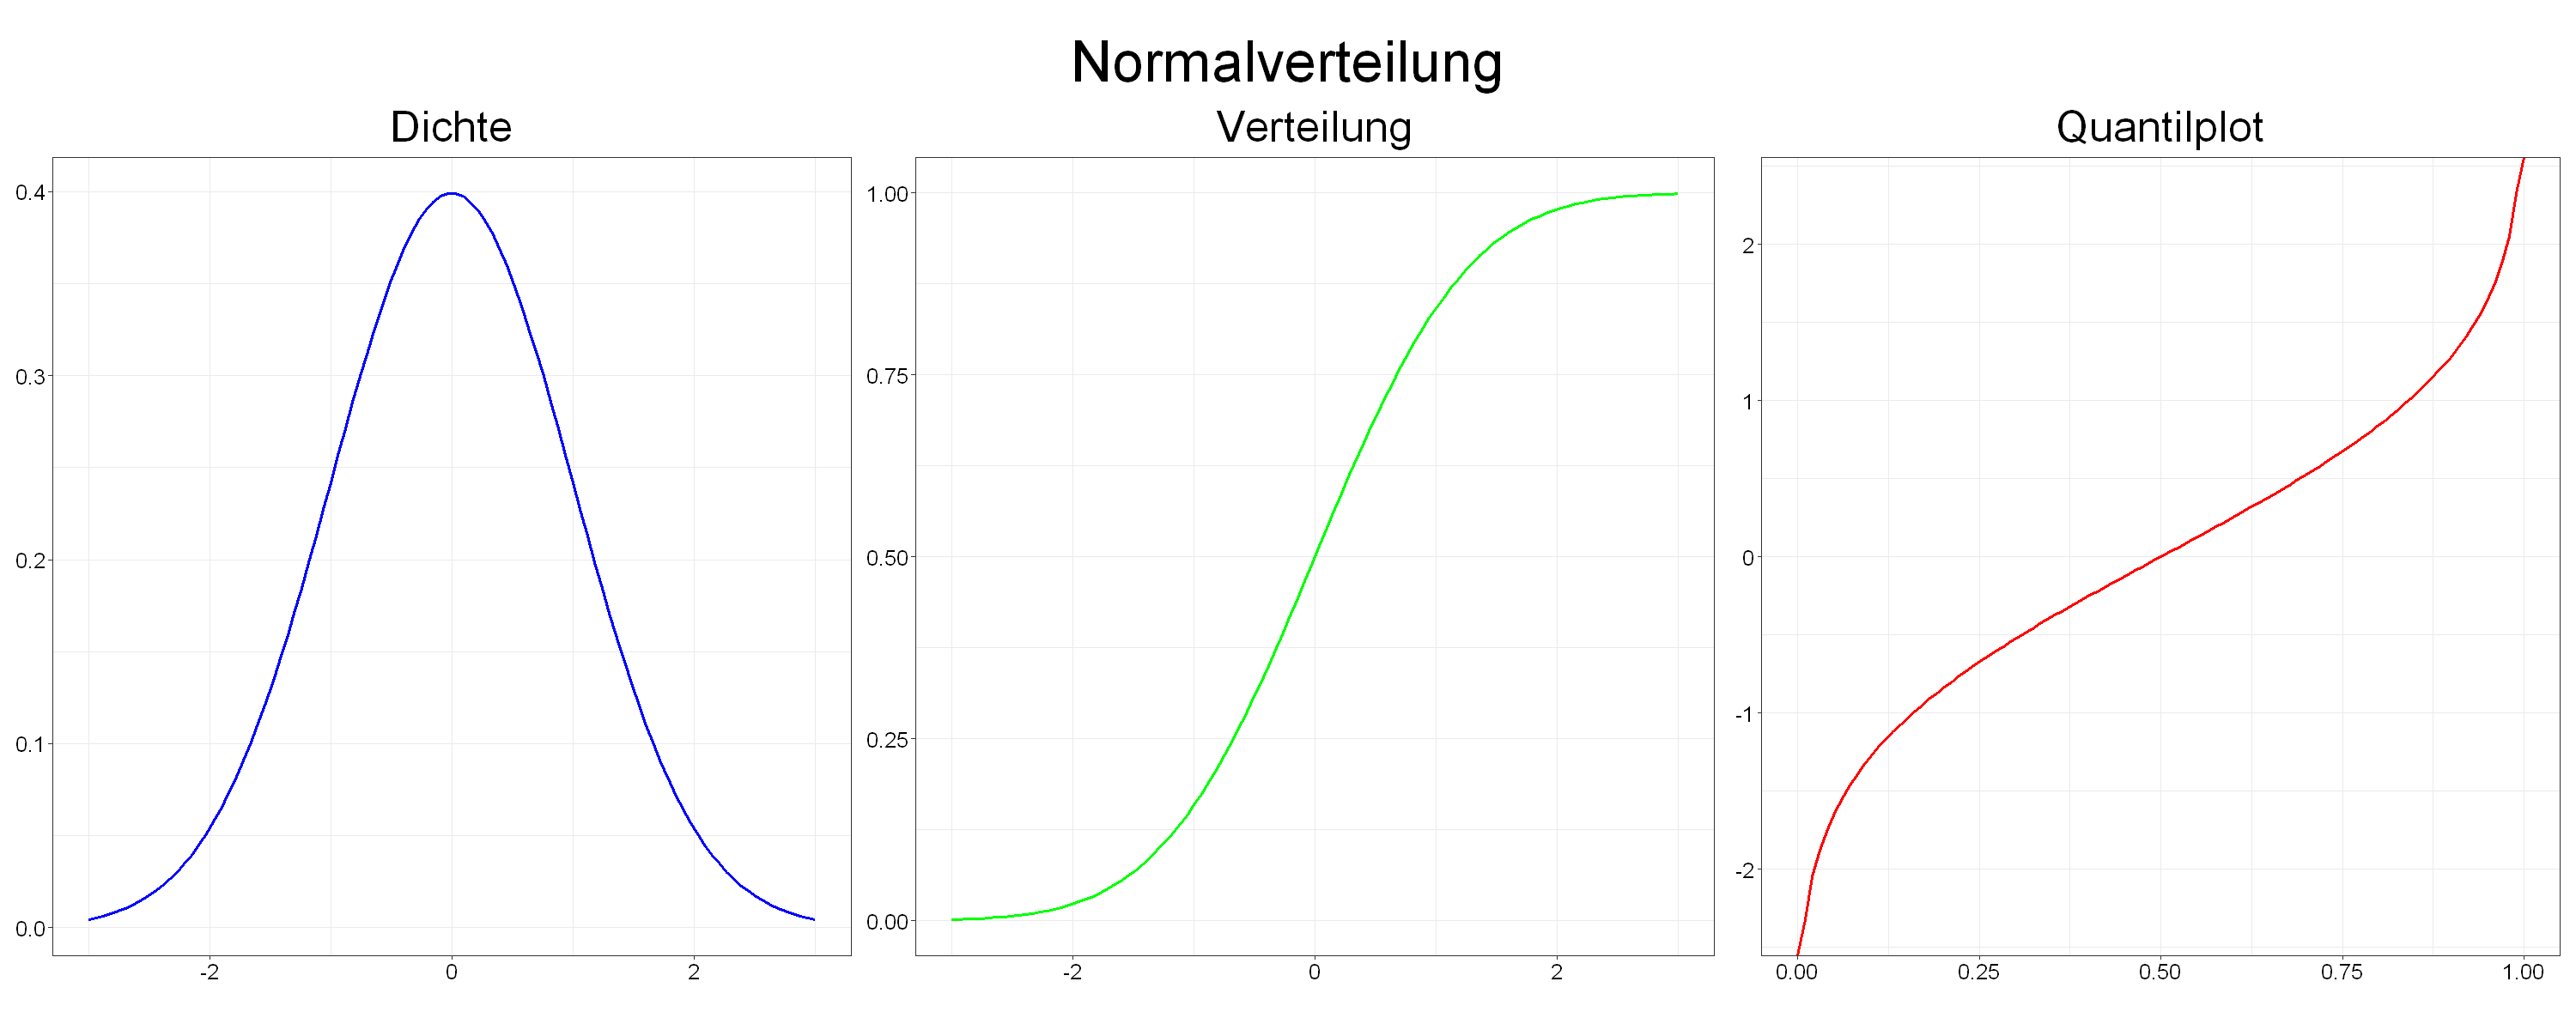

In [11]:
x <- seq(-3, 3, length=100)
combined_plot2("Normalverteilung", 
               x <- seq(-3, 3, length=100), 
               dnorm, 
               pnorm, 
               qnorm)

## Beispiel 2 : $\chi^2$-Verteilung - Rechtsschief

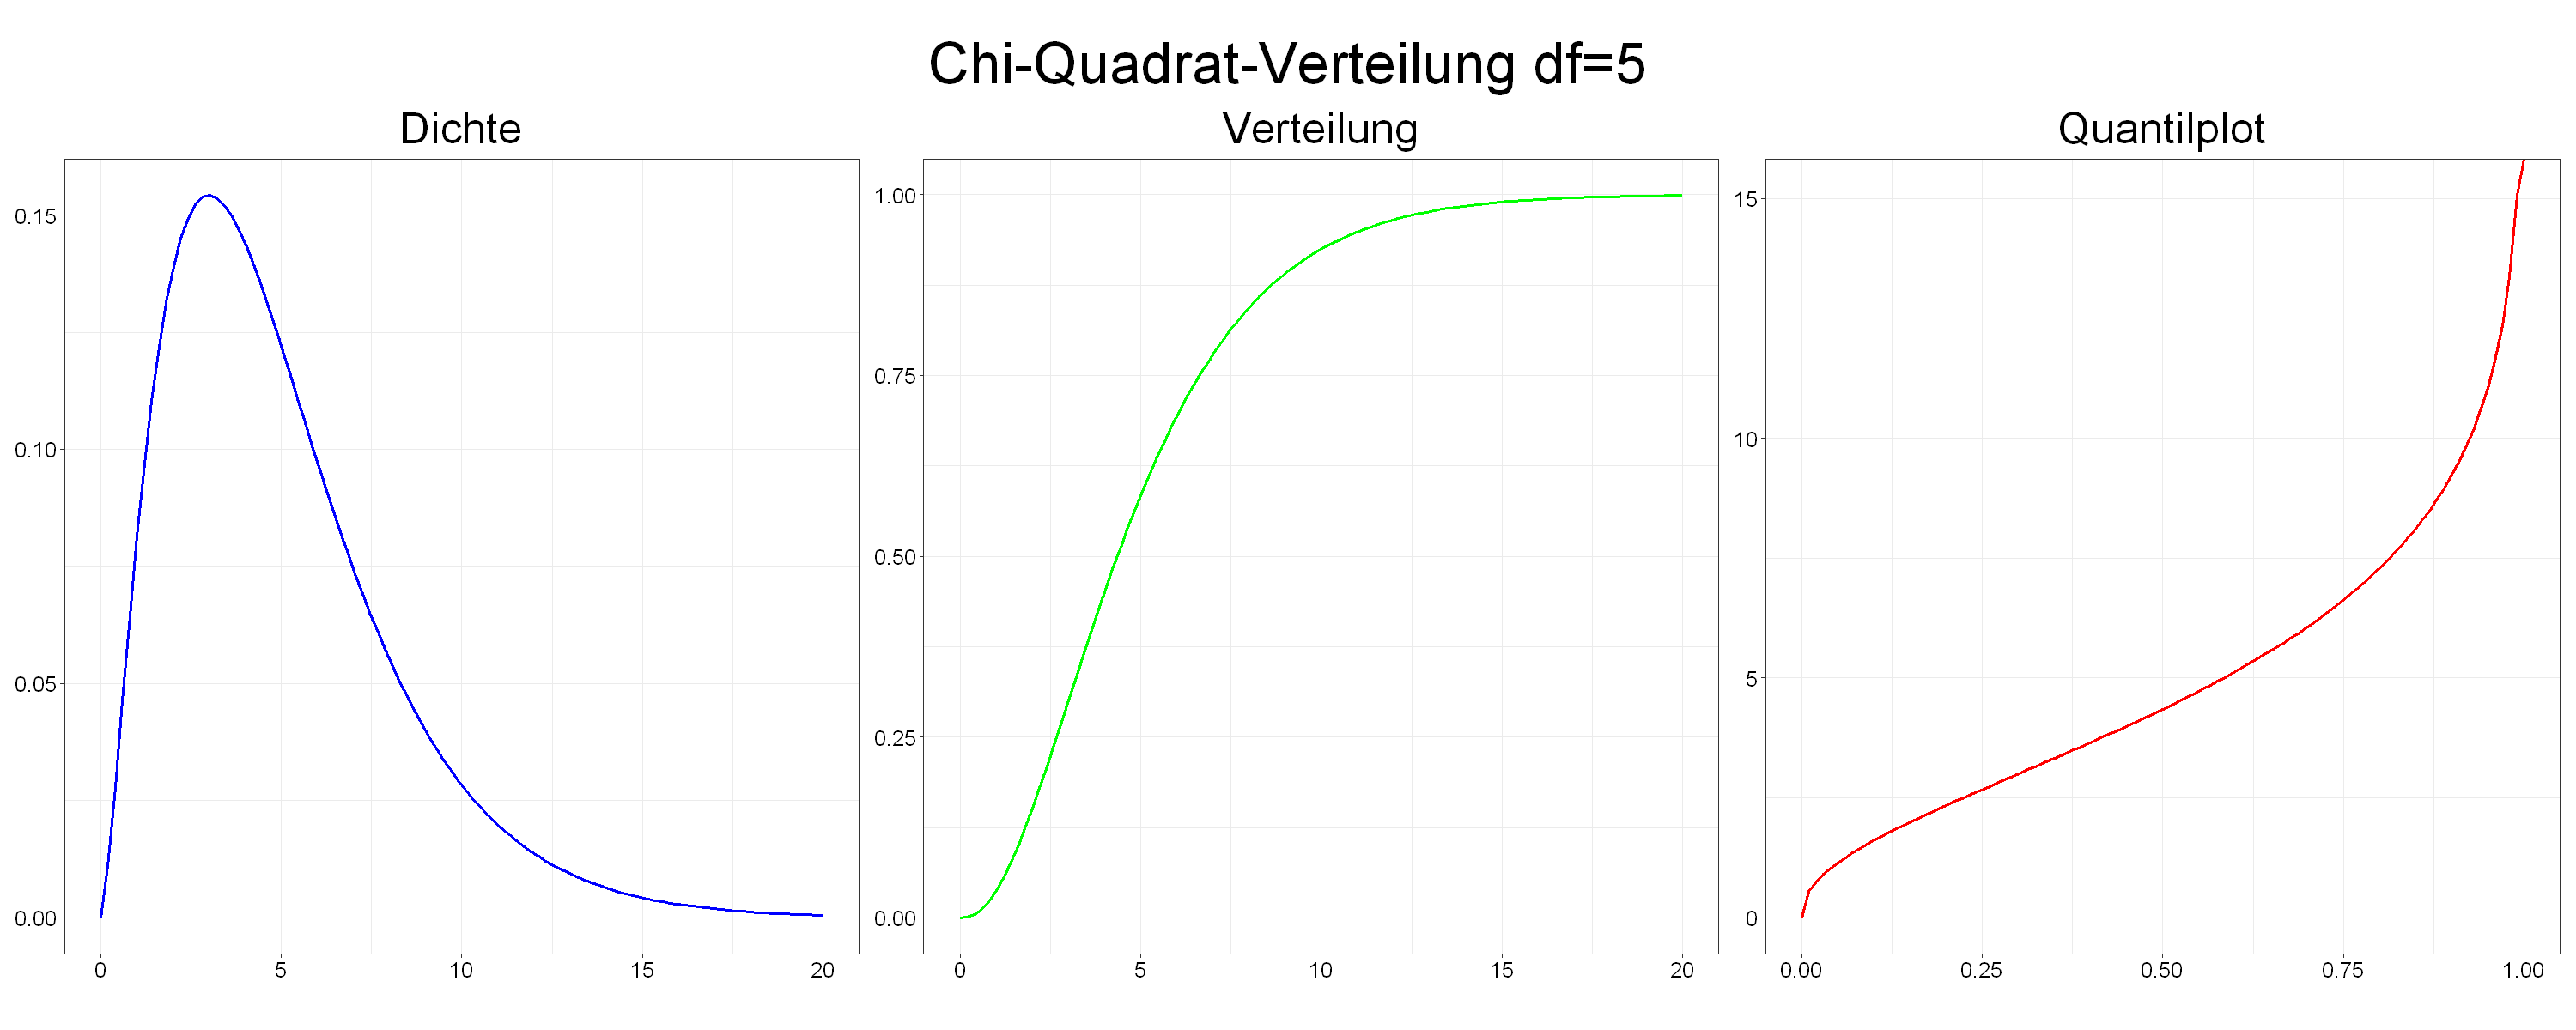

In [12]:
df <- 5
combined_plot2(sprintf("Chi-Quadrat-Verteilung df=%d",df), 
               seq(0, 20, length=100), 
               partial_func(dchisq, df=df), 
               partial_func(pchisq, df=df),  
               partial_func(qchisq, df=df))

## Beispiel 3 : Bimodale Mischverteilung 

s.a. Oldford - Figure 3 (iv)
$$
X \sim \frac{1}{2} N(0,1) + \frac{1}{2} N(6,1)
$$

### Simulation Mischverteilung

In [13]:
mu1 <- 0
sigma1 <- 1
mu2 <- 6
sigma2 <- 1

a <- 0.5
b <- 0.5

n <- 100000
set.seed(123)
component1 <- rnorm(n, mean = mu1, sd = sigma1)
component2 <- rnorm(n, mean = mu2, sd = sigma2)
mixture_data <- ifelse(runif(n) < 0.5, component1, component2) # generiere Werte aus [0,1] der Gleichverteilung

# Empirische Dichtefunktion
density_estimate <- density(mixture_data)
empirical_pdf <- approxfun(density_estimate$x, density_estimate$y)

# Empirische Verteilungsfunktion
empirical_cdf = ecdf(mixture_data)

# Auswertung PDF und CDF
x <- seq(-3, 10, length=100)
pdf_data <- data.frame(x = x, y = empirical_pdf(x))
cdf_data <- data.frame(x = x, y = empirical_cdf(x))

# Quantile
p <- seq(0, 1, length=100)
quantile_data <- data.frame(x = p, y = quantile(mixture_data, p))

### Plot

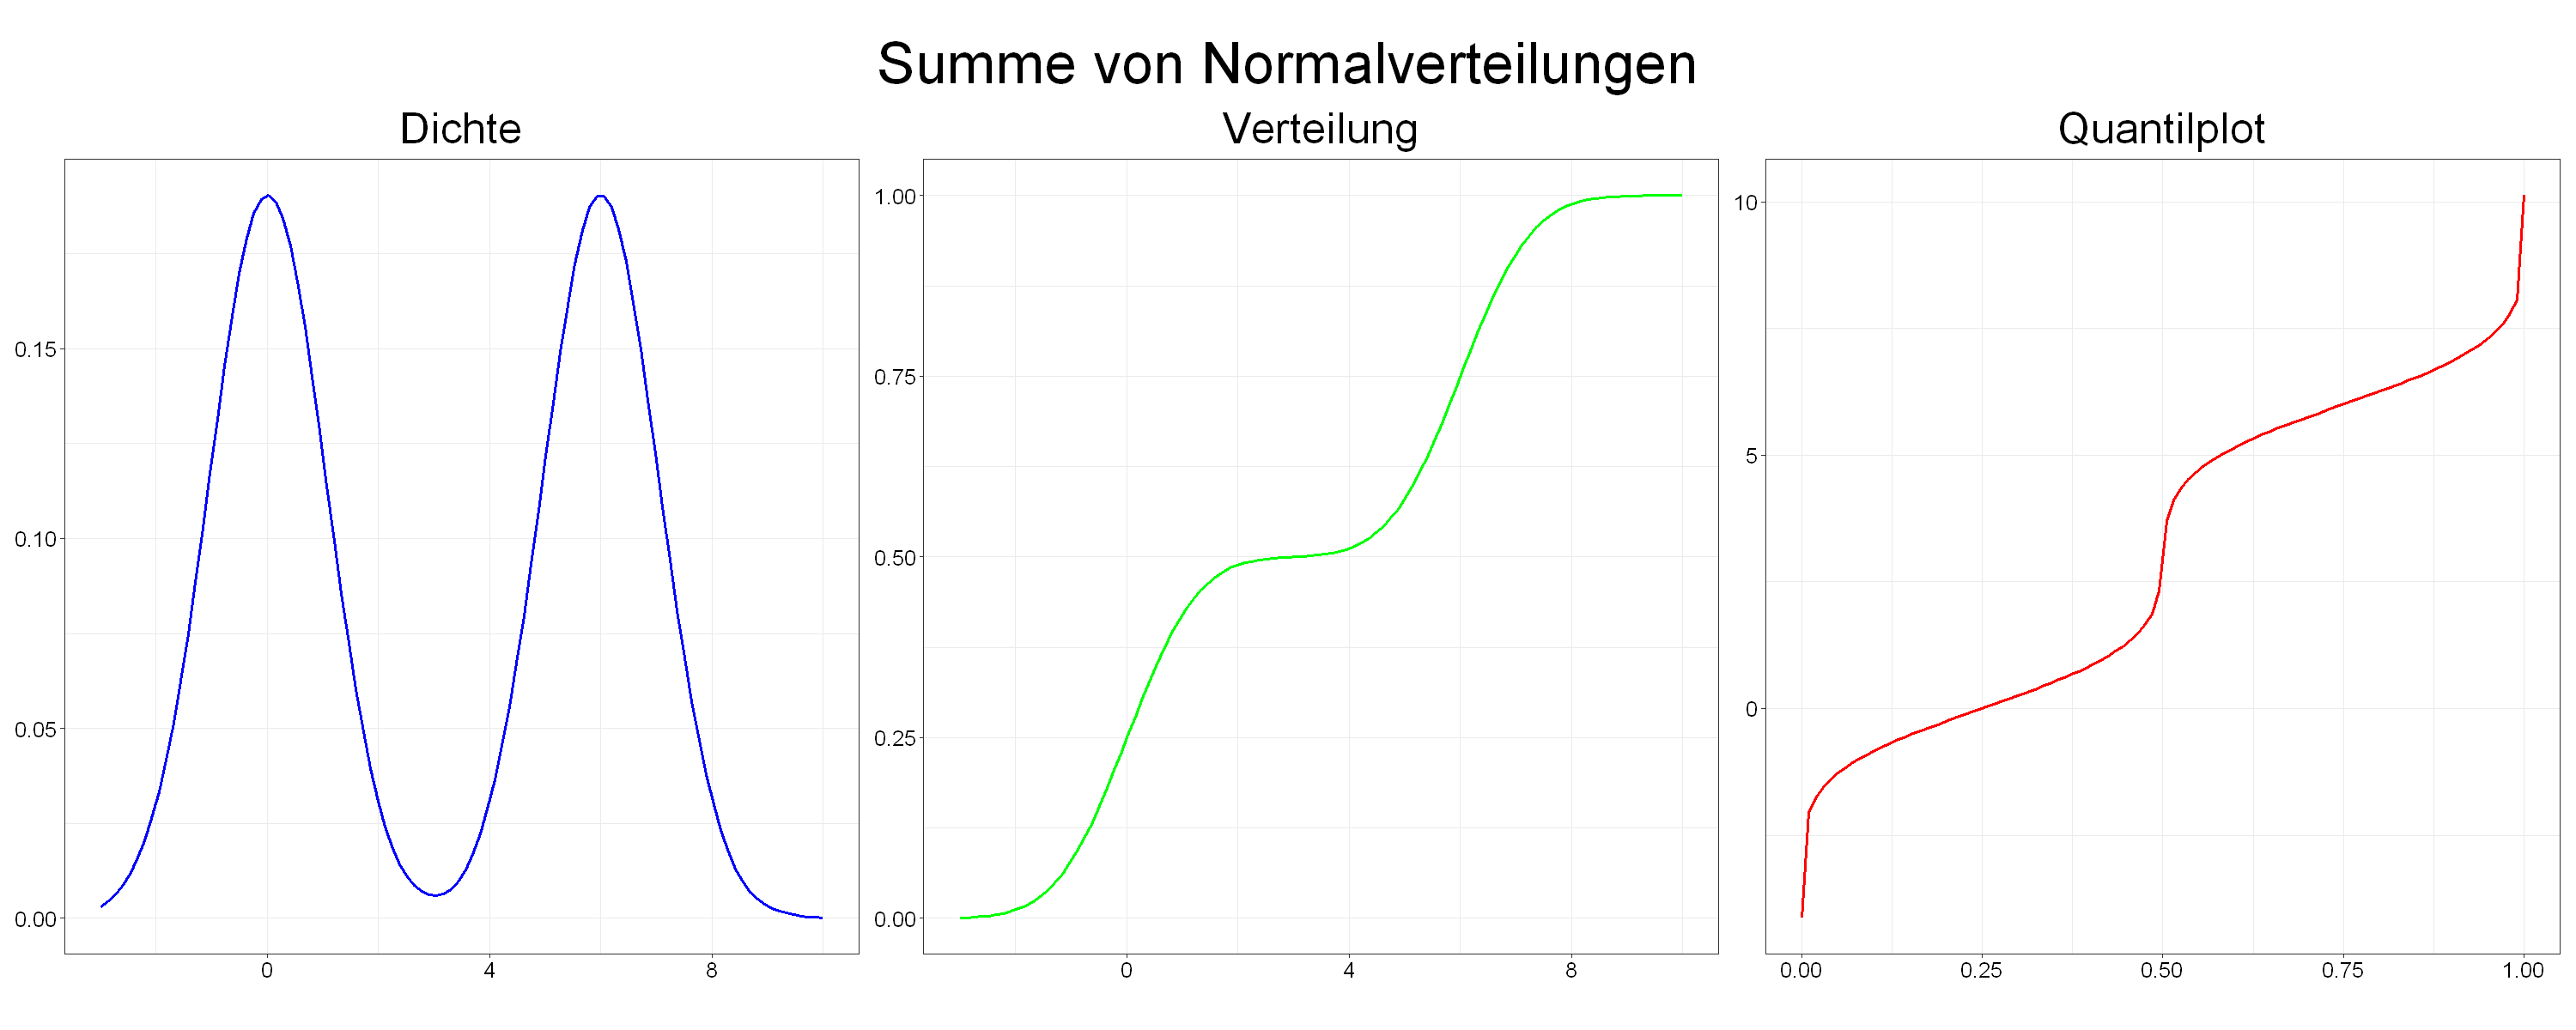

In [18]:
combined_plot("Summe von Normalverteilungen", 
              pdf_data, 
              cdf_data, 
              quantile_data)